In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Adjust the file path based on the verified path
file_path = '/content/drive/My Drive/train.csv'

# Read the file using pandas
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:

# Adjust the file path based on the verified path
file_path_test = '/content/drive/My Drive/test.csv'

# Read the file using pandas
df_kaggle = pd.read_csv(file_path_test)

# Display the first few rows of the dataframe
df_kaggle.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
print(df_kaggle.shape)


(4277, 13)


In [5]:

# Adjust the file path based on the verified path
file_path_sub = '/content/drive/My Drive/sample_submission.csv'

# Read the file using pandas
df_sub = pd.read_csv(file_path_sub)

# Display the first few rows of the dataframe
df_sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [6]:
print(df_sub.shape)


(4277, 2)


In [7]:
new_submission = df_kaggle[["PassengerId"]]
y = df["Transported"]



In [8]:
df.drop("Transported", axis=1, inplace=True)

# EDA

In [9]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [10]:
df.shape

(8693, 13)

In [11]:
df["Cabin"].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [12]:
def get_split(df, columns=[], splitstr="None", n=0, col_names=[]):
    for column in columns:
        split_cols = df[column].str.split(splitstr, expand=True)

        for i in range(min(n, len(split_cols.columns))):
            if i < len(col_names):
                df[col_names[i]] = split_cols[i]

    return df

In [13]:
get_split(df, columns = ["Cabin"], splitstr = "/", n=3, col_names=["Deck", "Num", "Side"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,E,608,S


In [14]:
get_split(df_kaggle, columns = ["Cabin"], splitstr = "/", n=3, col_names=["Deck", "Num", "Side"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


In [15]:
get_split(df, columns = ["PassengerId"], splitstr = "_", n=2, col_names=["Group_id", "Passenger_num"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side,Group_id,Passenger_num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,F,1,S,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,A,98,P,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,G,1499,S,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,G,1500,S,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,E,608,S,9280,01


In [16]:
get_split(df_kaggle, columns = ["PassengerId"], splitstr = "_", n=2, col_names=["Group_id", "Passenger_num"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side,Group_id,Passenger_num
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,0013,01
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,0018,01
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,0019,01
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,0021,01
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,0023,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S,9266,02
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN,9269,01
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P,9271,01
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P,9273,01


In [17]:
def cols_to_drop(df, cols_to_drop=[]):
  for col in cols_to_drop:
    df.drop(col, axis=1, inplace=True)

  return df

In [ ]:
def fill_missing_vals(df, cols_to_fill=[], methods=None, fill_zeros=None):
    if fill_zeros is not None:
        for col in cols_to_fill:
            df[col].fillna(fill_zeros, inplace=True)
    elif methods is None:
        for col in cols_to_fill:
            df[col].fillna(df[col].mean(), inplace=True)
    else:
        for col, method in zip(cols_to_fill, methods):
            if method == 'mean':
                df[col].fillna(df[col].mean(), inplace=True)
            elif method == 'median':
                df[col].fillna(df[col].median(), inplace=True)
            elif method == 'mode':
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna(method, inplace=True)

    return df

In [18]:
cols_to_drop(df, cols_to_drop=["Cabin", "Name", "PassengerId"])

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Group_id,Passenger_num
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P,0001,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S,0002,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S,0003,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S,0003,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,A,98,P,9276,01
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,G,1499,S,9278,01
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,G,1500,S,9279,01
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,E,608,S,9280,01


In [19]:
cols_to_drop(df_kaggle, cols_to_drop=["Cabin", "Name", "PassengerId"])

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Group_id,Passenger_num
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S,0013,01
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S,0018,01
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S,0019,01
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S,0021,01
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S,0023,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,1496,S,9266,02
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN,9269,01
4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,D,296,P,9271,01
4275,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,D,297,P,9273,01


In [20]:
pd.set_option('display.max_columns', None)

In [ ]:
def bool_encoder(df, columns=[]):
  for column in columns:
    df[column].replace({True: 1, False: 0}, inplace=True)

  return df

In [ ]:
deck = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
side = {'P': 1, 'S': 2}

def map_cat(df, col, mapping):
    df[col] = df[col].map(mapping)
    return df

In [ ]:
df = map_cat(df, "Deck", deck)

In [ ]:
df = map_cat(df, "Side", side)

In [ ]:
df_kaggle = map_cat(df_kaggle, "Deck", deck)

In [ ]:
df_kaggle = map_cat(df_kaggle, "Side", side)

In [ ]:
bool_encoder(df, columns=["Transported", "CryoSleep", "VIP"])

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Group_id,Passenger_num
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0,1.0,0001,01
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,6.0,0,2.0,0002,01
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,1.0,0,2.0,0003,01
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,1.0,0,2.0,0003,02
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,6.0,1,2.0,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0.0,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0,1.0,98,1.0,9276,01
8689,Earth,1.0,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7.0,1499,2.0,9278,01
8690,Earth,0.0,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1,7.0,1500,2.0,9279,01
8691,Europa,0.0,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0,5.0,608,2.0,9280,01


In [ ]:
bool_encoder(df_kaggle, columns=["CryoSleep", "VIP"])

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Group_id,Passenger_num
0,Earth,1.0,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3,2.0,0013,01
1,Earth,0.0,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,6.0,4,2.0,0018,01
2,Europa,1.0,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,2.0,0019,01
3,Europa,0.0,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,3.0,1,2.0,0021,01
4,Earth,0.0,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,6.0,5,2.0,0023,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1.0,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1496,2.0,9266,02
4273,Earth,0.0,TRAPPIST-1e,42.0,0.0,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN,9269,01
4274,Mars,1.0,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4.0,296,1.0,9271,01
4275,Europa,0.0,NaN,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,4.0,297,1.0,9273,01


In [ ]:
print(df["Deck"].isna().sum())
print(df["Num"].isna().sum())
print(df["Side"].isna().sum())


199
199
199


In [21]:
def one_hot_encoder(df, columns=[], drop_first=False):
    """
    Perform one hot encoding on specified columns of a DataFrame.

    Parameters:
    df (DataFrame): The input pandas DataFrame.
    columns (list): List of column names to be one hot encoded.
    drop_first (bool): Whether to drop the first category in each encoded column to avoid multicollinearity.

    Returns:
    DataFrame: DataFrame with specified columns one hot encoded.
    """


    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column, drop_first=drop_first, dtype=int)  # Specify dtype=int for integer encoding
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)

    return df

In [22]:
df = one_hot_encoder(df, columns=["HomePlanet", "Destination", "Deck","Side", "CryoSleep", "VIP"], drop_first=False)

In [23]:
df_kaggle = one_hot_encoder(df_kaggle, columns=['HomePlanet', "Destination", "Deck","Side", "CryoSleep", "VIP"], drop_first=False)

In [24]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Group_id,Passenger_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0001,01,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0002,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0003,01,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0003,02,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0004,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0


In [25]:
df_kaggle.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Group_id,Passenger_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,27.0,0.0,0.0,0.0,0.0,0.0,3,0013,01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,4,0018,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,0,0019,01,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0021,01,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0
4,20.0,10.0,0.0,635.0,0.0,0.0,5,0023,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0


In [29]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                Age  RoomService  FoodCourt  ShoppingMall  \
Age                        1.000000     0.068723   0.130421      0.033133   
RoomService                0.068723     1.000000  -0.015889      0.054480   
FoodCourt                  0.130421    -0.015889   1.000000     -0.014228   
ShoppingMall               0.033133     0.054480  -0.014228      1.000000   
Spa                        0.123970     0.010080   0.221891      0.013879   
VRDeck                     0.101007    -0.019581   0.227995     -0.007322   
Num                       -0.132255    -0.008986  -0.183429      0.001727   
Group_id                  -0.009439    -0.000346  -0.009552      0.017397   
Passenger_num             -0.132756    -0.022571   0.023391     -0.038812   
HomePlanet_Earth          -0.202348    -0.139361  -0.211176     -0.069880   
HomePlanet_Europa          0.219793    -0.068098   0.369477     -0.021282   
HomePlanet_Mars            0.016273     0.248013  -0.126142      0.112464   

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
def fill_missing_with_correlation_rounded(df):
    """
    Fill missing values in the DataFrame based on the highest correlated column, rounding to whole numbers.

    Parameters:
    df (DataFrame): The input pandas DataFrame.

    Returns:
    DataFrame: DataFrame with missing values filled based on correlation and rounded to whole numbers.
    """
    df = df.copy()  # Make a copy of the DataFrame to avoid modifying the original

    # Identify columns with missing values
    columns_with_na = df.columns[df.isna().any()].tolist()

    # Compute the correlation matrix
    corr_matrix = df.corr()

    for column in columns_with_na:
        # Get the most correlated column (excluding itself)
        correlated_col = corr_matrix[column].drop(column).idxmax()

        # Prepare data for linear regression
        not_na_mask = df[column].notna() & df[correlated_col].notna()
        if not_na_mask.sum() == 0:
            # Fallback strategy if no samples to train the model
            df[column].fillna(df[column].mean(), inplace=True)
            df[column] = df[column].round().astype(int)
            continue

        X = df.loc[not_na_mask, correlated_col].values.reshape(-1, 1)
        y = df.loc[not_na_mask, column].values

        # If correlated column also has NaN, fill them with SimpleImputer before training
        if df[correlated_col].isna().sum() > 0:
            imputer = SimpleImputer(strategy='mean')
            X = imputer.fit_transform(X)

        # Train linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Predict and fill missing values
        na_mask = df[column].isna() & df[correlated_col].notna()
        if na_mask.sum() > 0:
            X_missing = df.loc[na_mask, correlated_col].values.reshape(-1, 1)
            df.loc[na_mask, column] = np.round(model.predict(X_missing)).astype(int)

        # Fallback strategy for rows where the correlated column is also missing
        na_mask_fallback = df[column].isna()
        if na_mask_fallback.sum() > 0:
            df.loc[na_mask_fallback, column] = np.round(df[column].mean()).astype(int)

    return df

In [ ]:

def fill_missing_with_lr(df):
    """
    Fill missing values in specified columns using linear regression predictions based on the other columns.

    Parameters:
    df (DataFrame): The input pandas DataFrame.

    Returns:
    DataFrame: DataFrame with missing values filled.
    """
    df_filled = df.copy()
    target_cols = df.columns[df.isnull().any()].tolist()  # Automatically find columns with missing values

    for col in target_cols:
        missing_rows = df_filled[df_filled[col].isnull()]

        for idx in missing_rows.index:
            # Separate the row with the missing value
            row_with_nan = df_filled.loc[idx].copy()
            row_with_nan = row_with_nan.drop(labels=target_cols)  # Drop the target columns to predict
            X_missing = row_with_nan.values.reshape(1, -1)

            # Prepare the data for fitting the model
            train_data = df_filled.dropna(subset=[col])
            X_train = train_data.drop(columns=target_cols)
            y_train = train_data[col]

            # Fit the linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Predict the missing value
            predicted_value = model.predict(X_missing)

            # Fill the missing value
            df_filled.loc[idx, col] = predicted_value

    return df_filled

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
def fill_missing_with_lr(df):
        df_filled = df.copy()
        target_cols = df.columns[df.isnull().any()].tolist()
        for col in target_cols:
            missing_rows = df_filled[df_filled[col].isnull()]
            for idx in missing_rows.index:
                row_with_nan = df_filled.loc[idx].copy().drop(labels=target_cols)
                X_missing = row_with_nan.values.reshape(1, -1)
                train_data = df_filled.dropna(subset=[col])
                X_train = train_data.drop(columns=target_cols)
                y_train = train_data[col]
                model = LinearRegression()
                model.fit(X_train, y_train)
                predicted_value = model.predict(pd.DataFrame(X_missing, columns=X_train.columns))
                df_filled.loc[idx, col] = predicted_value
        return df_filled

In [31]:
df= fill_missing_with_lr(df)

In [41]:
df_kaggle = fill_missing_with_lr(df_kaggle)

In [42]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Group_id,Passenger_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0001,01,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0002,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0003,01,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0003,02,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0004,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0


In [43]:
df_kaggle.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Group_id,Passenger_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,27.0,0.0,0.0,0.0,0.0,0.0,3,0013,01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,4,0018,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,0,0019,01,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0021,01,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0
4,20.0,10.0,0.0,635.0,0.0,0.0,5,0023,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0


In [ ]:
#df_fin= add_feature_sum(df, new_feature='TotalBill', col_names=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"])

In [ ]:
#df_fin_kaggle = add_feature_sum(df_kaggle, new_feature='TotalBill', col_names=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"])

In [44]:
df.isna().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Num                          0
Group_id                     0
Passenger_num                0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
CryoSleep_False              0
CryoSleep_True               0
VIP_False                    0
VIP_True                     0
dtype: int64

In [45]:
df_kaggle.isna().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Num                          0
Group_id                     0
Passenger_num                0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
CryoSleep_False              0
CryoSleep_True               0
VIP_False                    0
VIP_True                     0
dtype: int64

In [46]:
from sklearn.preprocessing import KBinsDiscretizer

In [47]:
def discretize_data(df, cols_to_discretize, n_bins=4):
  df = df.copy()
  for column in cols_to_discretize:
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal')
    df[column] = discretizer.fit_transform(df[[column]])

  return df


In [48]:
dsc_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Group_id"]


In [49]:
dsc_fin = discretize_data(df, dsc_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279

In [50]:
dsc_fin_kaggle = discretize_data(df_kaggle, dsc_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279

In [51]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Group_id,Passenger_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0001,01,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0002,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0003,01,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0003,02,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0004,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0


In [52]:
dsc_fin.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Group_id,Passenger_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,3.0,1.0,1.0,1.0,1.0,1.0,0,0.0,01,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
1,1.0,2.0,1.0,1.0,2.0,1.0,0,0.0,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
2,3.0,1.0,2.0,1.0,2.0,1.0,0,0.0,01,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1
3,2.0,1.0,2.0,2.0,2.0,2.0,0,0.0,02,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0
4,0.0,2.0,1.0,2.0,2.0,1.0,1,0.0,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0


In [53]:
dsc_fin["RoomService"].value_counts()

RoomService
1.0    6467
2.0    2176
0.0      50
Name: count, dtype: int64

In [ ]:
# models training

# **Basic model Logistic Regression**

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3454
           1       0.79      0.81      0.80      3500

    accuracy                           0.80      6954
   macro avg       0.80      0.80      0.80      6954
weighted avg       0.80      0.80      0.80      6954

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       861
           1       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



<Axes: >

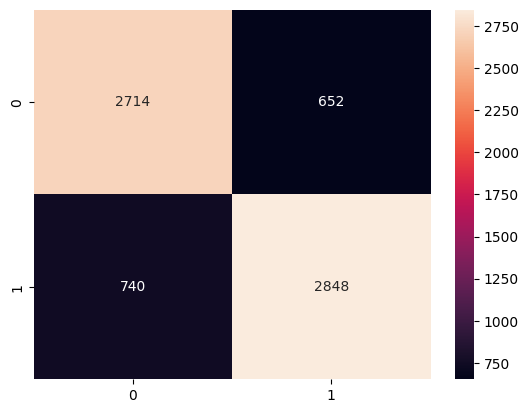

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


X = df.drop("Transported", axis=1)
y = df["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_1 = LogisticRegression(solver = "liblinear", penalty = "l2", max_iter = 500)
model_1.fit(X_train, y_train)
y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train.T, annot=True, fmt='d')

# **Basic model Logistic Regression with discretized data**

              precision    recall  f1-score   support

           0       0.71      0.38      0.49      3454
           1       0.58      0.85      0.69      3500

    accuracy                           0.61      6954
   macro avg       0.65      0.61      0.59      6954
weighted avg       0.65      0.61      0.59      6954

              precision    recall  f1-score   support

           0       0.72      0.36      0.48       861
           1       0.58      0.86      0.69       878

    accuracy                           0.61      1739
   macro avg       0.65      0.61      0.59      1739
weighted avg       0.65      0.61      0.59      1739



<Axes: >

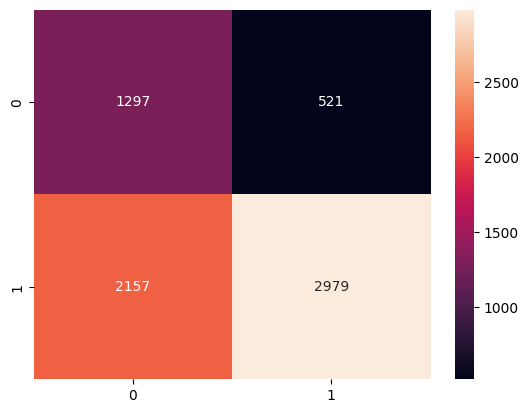

In [ ]:
X = dsc_fin.drop("Transported", axis=1)
y = dsc_fin["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_2 = LogisticRegression(solver = "liblinear", penalty = "l1", max_iter = 200)
model_2.fit(X_train, y_train)
y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train.T, annot=True, fmt='d')

# **Random Forest Classifier**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],        # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],         # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30, 40, 50],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],                       # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy']                  # Function to measure the quality of a split
}

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3454
           1       0.96      0.97      0.96      3500

    accuracy                           0.96      6954
   macro avg       0.96      0.96      0.96      6954
weighted avg       0.96      0.96      0.96      6954


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       861
           1       0.80      0.80      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



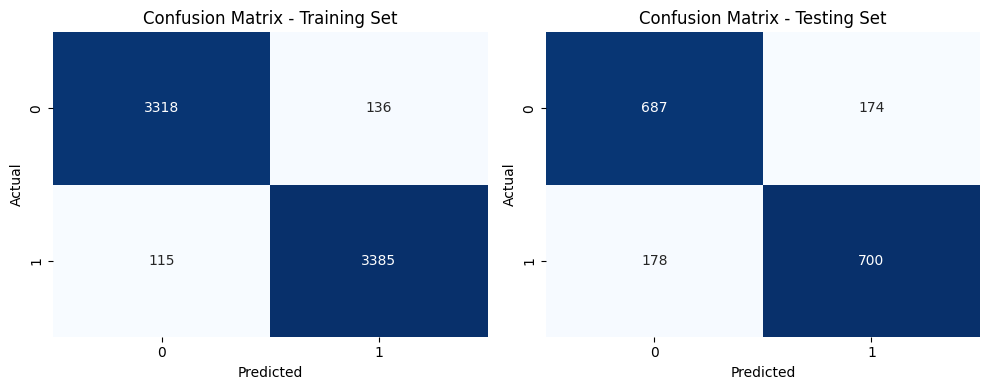

In [ ]:

X = df.drop("Transported", axis=1)
y = df["Transported"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200,],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 9, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False],
    'criterion': ['entropy']
}


rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)


y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)


print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_pred_test))


cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")


plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# **Random Forest Classifier whole data train**

In [ ]:
X = df.drop("Transported", axis=1)
y = df["Transported"]




param_grid = {
    'n_estimators': [100, 200,],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 9, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False],
    'criterion': ['entropy']
}


rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


grid_search.fit(X, y)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_rf_W = RandomForestClassifier(**best_params, random_state=42)
best_rf_W.fit(X, y)


y_pred_train = best_rf.predict(X)



print("Training Classification Report:")
print(classification_report(y, y_pred_train))



Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Training Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79      4315
           1       0.84      0.67      0.74      4378

    accuracy                           0.77      8693
   macro avg       0.78      0.77      0.76      8693
weighted avg       0.78      0.77      0.76      8693



# **ADA Boost and random Forest Classifier with best params and non - discretized data**

Missing values in each column:
 CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Deck                         0
Num                          0
Side                         0
Group_id                     0
Passenger_num                0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3454
           1       1.00      1.00      1.00      3500

    accuracy                           1.00      6954
   macro avg       1.00      1.00      1.00      6954
weighted avg       1.00      1.00      1.00      6954


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       861
           1       0.82      0.78      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



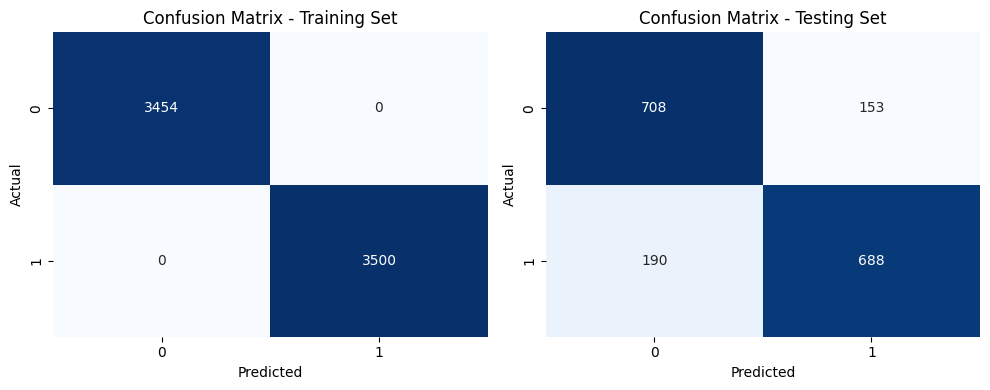

In [ ]:
# Assuming df_encoded is your preprocessed DataFrame
# Splitting the data into features and target variable
X = df.drop("Transported", axis=1)
y = df["Transported"]

# Check for missing values
missing_values_count = X.isna().sum()
print("Missing values in each column:\n", missing_values_count)

# Handling missing values by imputing with the mean (you can use other strategies as well)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=4,
                            max_features='sqrt', bootstrap=True, criterion='entropy', random_state=42)
rf.fit(X_train, y_train)

# Enhance the RandomForestClassifier with AdaBoost
ada_nd = AdaBoostClassifier(base_estimator=rf, n_estimators=50, random_state=42)
ada_nd.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train = ada_nd.predict(X_train)
y_pred_test = ada_nd.predict(X_test)

# Print classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_pred_test))

# Creating confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix heatmap for training set
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Plotting the confusion matrix heatmap for testing set
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# **ADA Boost and random Forest Classifier with best params and discretized data**

Missing values in each column:
 CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Deck                         0
Num                          0
Side                         0
Group_id                     0
Passenger_num                0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3454
           1       1.00      1.00      1.00      3500

    accuracy                           1.00      6954
   macro avg       1.00      1.00      1.00      6954
weighted avg       1.00      1.00      1.00      6954


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       861
           1       0.68      0.68      0.68       878

    accuracy                           0.68      1739
   macro avg       0.68      0.68      0.68      1739
weighted avg       0.68      0.68      0.68      1739



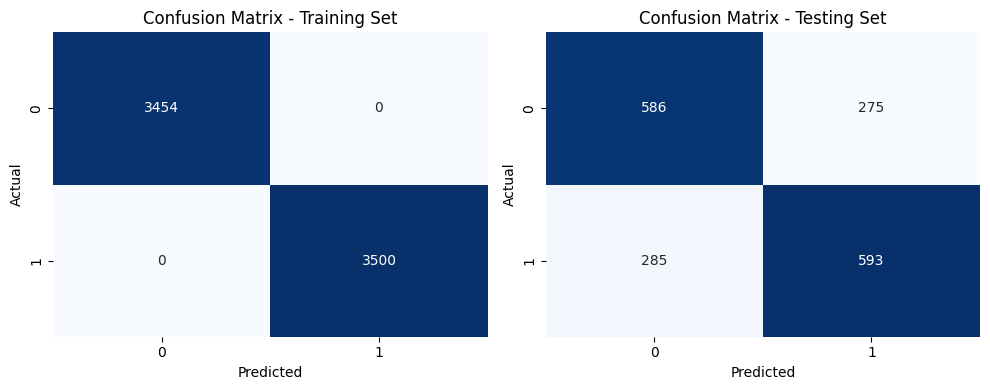

In [ ]:
# Assuming df_encoded is your preprocessed DataFrame
# Splitting the data into features and target variable
X = dsc_fin.drop("Transported", axis=1)
y = dsc_fin["Transported"]

# Check for missing values
missing_values_count = X.isna().sum()
print("Missing values in each column:\n", missing_values_count)

# Handling missing values by imputing with the mean (you can use other strategies as well)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=4,
                            max_features='sqrt', bootstrap=True, criterion='entropy', random_state=42)
rf.fit(X_train, y_train)

# Enhance the RandomForestClassifier with AdaBoost
ada_d = AdaBoostClassifier(base_estimator=rf, n_estimators=50, random_state=42)
ada_d.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train = ada_d.predict(X_train)
y_pred_test = ada_d.predict(X_test)

# Print classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_pred_test))

# Creating confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix heatmap for training set
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Plotting the confusion matrix heatmap for testing set
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# **Random forest with discretized data**

Missing values in each column:
 CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Deck                         0
Num                          0
Side                         0
Group_id                     0
Passenger_num                0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64
Training Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      3454
           1       0.89      0.77      0.82      3500

    accuracy                           0.83      6954
   macro avg       0.84      0.83      0.83      6954
weighted avg       0.84      0.83      0.83      6954


Testin

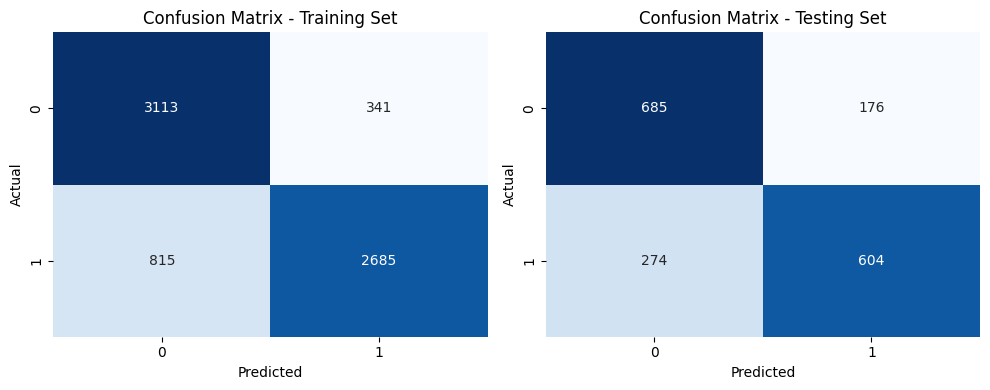

In [ ]:
# Assuming df_encoded is your preprocessed DataFrame
# Splitting the data into features and target variable
X = dsc_fin.drop("Transported", axis=1)
y = dsc_fin["Transported"]

# Check for missing values
missing_values_count = X.isna().sum()
print("Missing values in each column:\n", missing_values_count)

# Handling missing values by imputing with the mean (you can use other strategies as well)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
rf_d = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=4,
                            max_features='sqrt', bootstrap=True, criterion='entropy', random_state=42)
rf_d.fit(X_train, y_train)

y_pred_train = rf_d.predict(X_train)
y_pred_test = rf_d.predict(X_test)


print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_pred_test))


cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")


plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# **Gradien boost and random forest with best params and discretized data**

Missing values in each column:
 CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Deck                         0
Num                          0
Side                         0
Group_id                     0
Passenger_num                0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64
Training Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      3454
           1       0.81      0.68      0.74      3500

    accuracy                           0.76      6954
   macro avg       0.77      0.76      0.76      6954
weighted avg       0.77      0.76      0.76      6954


Testin

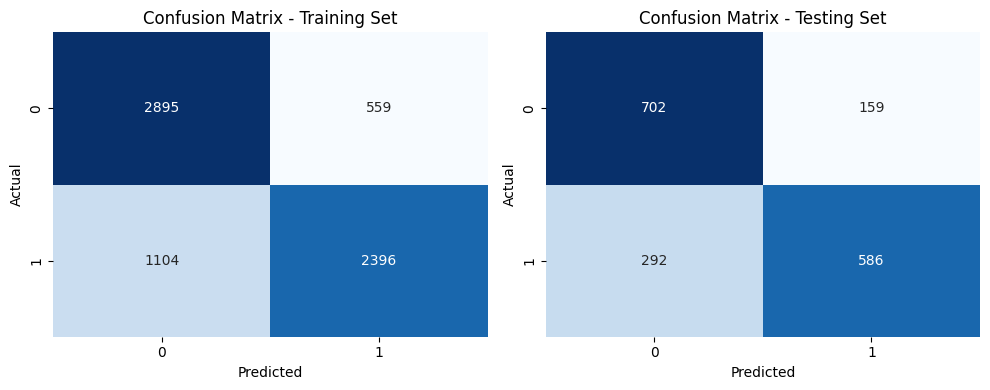

In [ ]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Assuming df_encoded is your preprocessed DataFrame
# Splitting the data into features and target variable
X = dsc_fin.drop("Transported", axis=1)
y = dsc_fin["Transported"]

# Check for missing values
missing_values_count = X.isna().sum()
print("Missing values in each column:\n", missing_values_count)

# Handling missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=9, min_samples_split=2, min_samples_leaf=4,
                            max_features='sqrt', bootstrap=True, criterion='entropy', random_state=42)
rf.fit(X_train, y_train)

# Enhance the RandomForestClassifier with GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

# Print classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_pred_test))

# Creating confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix heatmap for training set
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Plotting the confusion matrix heatmap for testing set
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

Missing values in each column:
 CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Num                          0
Group_id                     0
Passenger_num                0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_1.0                     0
Deck_2.0                     0
Deck_3.0                     0
Deck_4.0                     0
Deck_5.0                     0
Deck_6.0                     0
Deck_7.0                     0
Deck_8.0                     0
Side_1.0                     0
Side_2.0                     0
dtype: int64
Training Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.

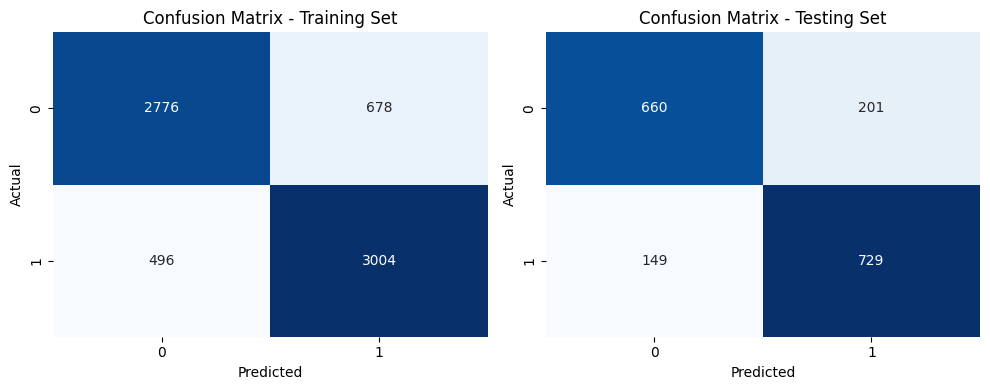

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Assuming df_encoded is your preprocessed DataFrame
# Splitting the data into features and target variable
X = df.drop("Transported", axis=1)
y = df["Transported"]

# Check for missing values
missing_values_count = X.isna().sum()
print("Missing values in each column:\n", missing_values_count)

# Handling missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=9, min_samples_split=2, min_samples_leaf=4,
                            max_features='sqrt', bootstrap=True, criterion='entropy', random_state=42)
rf.fit(X_train, y_train)

# Enhance the RandomForestClassifier with GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

# Print classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_pred_test))

# Creating confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix heatmap for training set
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Plotting the confusion matrix heatmap for testing set
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


X = df.drop("Transported", axis=1)
y = df["Transported"]



# Train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=5,
                            max_features='sqrt', bootstrap=True, criterion='entropy', random_state=42)
rf.fit(X, y)

# Enhance the RandomForestClassifier with GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
gb.fit(X, y)

# Make predictions on the training and testing sets
y_pred = gb.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)



0.8502243184171172

In [ ]:
# Boosting nezlepšil výsledky RF
# diskretiácia nzlepšila výsledky

# **Best model - Random Forest with discretized data - param testing  **

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.81      3454
           1       0.85      0.70      0.77      3500

    accuracy                           0.79      6954
   macro avg       0.80      0.79      0.79      6954
weighted avg       0.80      0.79      0.79      6954


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       861
           1       0.79      0.67      0.73       878

    accuracy                           0.74      1739
   macro avg       0.75      0.75      0.74      1739
weighted avg       0.75      0.74      0.74      1739



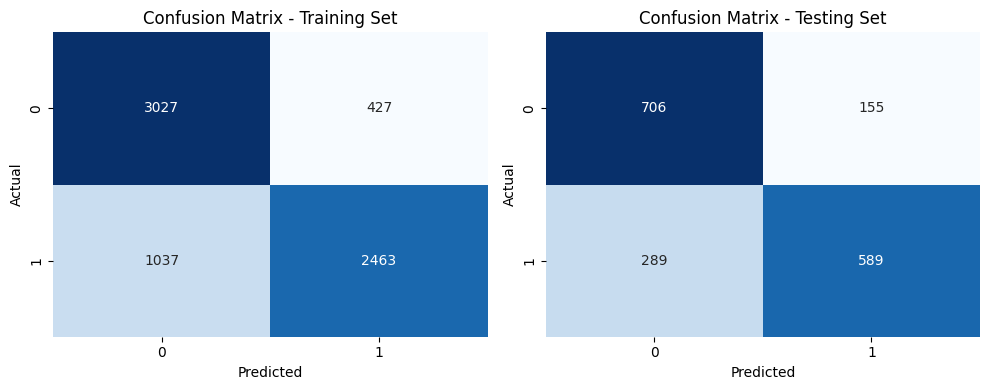

In [ ]:
X = dsc_fin.drop("Transported, axis=1)
y = dsc_fin["Transported"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200,],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 9, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False],
    'criterion': ['entropy']
}


rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)


y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)


print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_pred_test))


cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")


plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Preprocessing

In [ ]:
y = df.pop('Transported')

new_submission = df_kaggle[["PassengerId"]]
new_submission.head()

In [ ]:
def preproces_data(x):
  x_output = x.select_dtypes(exclude=['object'])
  x_output = x_output.fillna(0)
  return(x_output)

In [ ]:
X = preproces_data(df)
X_kaggle = preproces_data(df_kaggle)

# Modelling

In [ ]:
params = {'C': [0.1, 1, 10],
          'max_iter': [100000]}

In [ ]:
lr_cv = GridSearchCV(LogisticRegression(), params, cv = 5)
lr_cv.fit(X,y)
print(lr_cv.best_params_)

In [ ]:
print(lr_cv.best_score_)

# **Multi model test and ensemble, whole data**

In [55]:
X = df


In [56]:
X_d = dsc_fin
y_d = y

Simple logistic regression models

In [63]:

model_1 = LogisticRegression(solver = "liblinear", penalty = "l1", max_iter = 200)
model_1.fit(X, y)
y_pred_m1= model_1.predict(X)

In [64]:
model_11 = LogisticRegression(solver = "newton-cholesky", penalty = 'l2', max_iter = 300)
model_11.fit(X, y)
y_pred_m11= model_11.predict(X)

In [66]:
model_12 = LogisticRegression(solver = "newton-cg", penalty = 'l2', max_iter = 2000)
model_12.fit(X, y)
y_pred_m12= model_12.predict(X)

In [67]:
model_13 = LogisticRegression(solver = "newton-cholesky", penalty = 'none', max_iter = 1000)
model_13.fit(X, y)
y_pred_m1= model_13.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=4.38196e-24): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Simple logistic regression discretized data

In [68]:

model_2 = LogisticRegression(solver = "liblinear", penalty = "l1", max_iter = 200)
model_2.fit(X_d, y_d)
y_pred_m2= model_2.predict(X_d)


Random forest classsifier

In [69]:


param_grid = {
    'n_estimators': 200,
    'max_features': 'sqrt',
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'bootstrap': True,
    'criterion': 'entropy'
}

model_3 = RandomForestClassifier(**param_grid, random_state=42)
model_3.fit(X, y)
y_pred_m3 = model_3.predict(X)


In [70]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


param_grid = {
    'n_estimators': 200,
    'max_features': 'sqrt',
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'bootstrap': True,
    'criterion': 'entropy'
}


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(**param_grid, random_state=42))
])


pipeline.fit(X, y)
y_pred_m3 = pipeline.predict(X)

In [71]:



param_grid = {
    'n_estimators': 200,
    'max_features': 'sqrt',
    'max_depth': 9,
    'min_samples_split': 3,
    'min_samples_leaf': 2,
    'bootstrap': True,
    'criterion': 'gini'
}


pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(**param_grid, random_state=42))
])


pipeline2.fit(X, y)
y_pred_m3 = pipeline2.predict(X)

ADA Boost + RFC

In [72]:

rf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=2,
                            max_features='sqrt', bootstrap=True, criterion='entropy', random_state=42)
rf.fit(X, y)
model_4 = AdaBoostClassifier(base_estimator=rf, n_estimators=50, random_state=42)
model_4.fit(X, y)
y_pred_ada_nd= model_4.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [74]:
pipeline3 = Pipeline([("scaler", StandardScaler()), ("rf", RandomForestClassifier(**param_grid, random_state=42))])
pipeline3.fit(X, y)
y_pred_m4 = pipeline3.predict(X)

ADA Boost + RFC discretized data

In [75]:

rf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=2,
                            max_features='sqrt', bootstrap=True, criterion='entropy', random_state=42)
rf.fit(X_d, y_d)

model_5 = AdaBoostClassifier(base_estimator=rf, n_estimators=50, random_state=42)
model_5.fit(X_d, y_d)
y_pred_ada_d = model_5.predict(X_d)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random forest classifier, discretized data

In [76]:
model_6 = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=2,
                            max_features='sqrt', bootstrap=True, criterion='entropy', random_state=42)
model_6.fit(X_d, y_d)
y_pred_rf_d= model_6.predict(X_d)

Random forest classifier, non - discretized data

In [77]:
model_7 = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=2,
                            max_features='sqrt', bootstrap=True, criterion='entropy', random_state=42)
model_7.fit(X, y)
y_pred_rf_d= model_7.predict(X)

In [81]:
param_grid = {
    'n_estimators': 200,
    'max_features': 'sqrt',
    'max_depth': 9,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'bootstrap': True,
    'criterion': 'entropy'
}


pipeline4 = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(**param_grid, random_state=42))
])


pipeline4.fit(X, y)
y_pred_m5 = pipeline4.predict(X)

Gradient boost, discretized data

In [78]:
rf = RandomForestClassifier(n_estimators=200, max_depth=9, min_samples_split=2, min_samples_leaf=2,
                            max_features='sqrt', bootstrap=True, criterion='entropy', random_state=42)
rf.fit(X_d, y_d)

model_8 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_8.fit(X_d, y_d)
y_pred_gb_d= model_8.predict(X_d)

Gradient boost, non - discretized data

In [82]:
rf = RandomForestClassifier(n_estimators=200, max_depth=9, min_samples_split=2, min_samples_leaf=2,
                            max_features='sqrt', bootstrap=True, criterion='entropy', random_state=42)
rf.fit(X, y)

model_9 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_9.fit(X, y)
y_pred_gb_d= model_9.predict(X)

In [83]:
from sklearn.ensemble import VotingClassifier

In [84]:
ensemble_model = VotingClassifier(
    estimators=[
        ("LR1", model_1),
        ("LR2", model_11),
        ("LR3", model_12),
        ("LR4", model_13),
        ("LR5", model_2),
        ("RF1", model_3),
        ("RF2", model_4),
        ("RF3", model_5),
        ("RF4", model_6),
        ("RF5", model_7),
        ("RF6", model_8),
        ("RF7", model_9),
        ("RF8", pipeline),
        ("RF9", pipeline2),
        ("RF10", pipeline3),
        ("RF11", pipeline4)

    ],
    voting='hard'  # Use 'hard' for majority voting, 'soft' for weighted average of predicted probabilities
)

In [85]:
ensemble_model.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=4.38196e-24): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

VotingClassifier(estimators=[('LR1',
                              LogisticRegression(max_iter=200, penalty='l1',
                                                 solver='liblinear')),
                             ('LR2',
                              LogisticRegression(max_iter=300,
                                                 solver='newton-cholesky')),
                             ('LR3',
                              LogisticRegression(max_iter=2000,
                                                 solver='newton-cg')),
                             ('LR4',
                              LogisticRegression(max_iter=1000, penalty='none',
                                                 solver='newton-cholesky')),
                             ('LR5',
                              LogisticRegression(max_iter=200,...
                                                                      random_state=42))])),
                             ('RF10',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('rf',
                                               RandomForestClassifier(max_depth=9,
                                                                      min_samples_leaf=2,
                                                                      min_samples_split=3,
                                                                      n_estimators=200,
                                                                      random_state=42))])),
                             ('RF11',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('rf',
                                               RandomForestClassifier(criterion='entropy',
                                                                      max_depth=9,
                                                                      min_samples_leaf=2,
                                                                      n_estimators=200,
                                                                      random_state=42))]))])

In [86]:
y_pred = ensemble_model.predict(X)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.8659841251581732

In [88]:
y_pred_kaggle = ensemble_model.predict(df_kaggle)

# **Kaggle Submission**

In [89]:
submission_pred = model_9.predict(df_kaggle)
submission = submission_pred.astype(bool)

In [90]:
submission

array([ True, False,  True, ...,  True,  True,  True])

In [91]:

passenger_ids = new_submission['PassengerId'].values
transported_predictions = submission

sub_df = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": transported_predictions
})

print(sub_df.head())

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [93]:
sub_df.to_csv("ensemble_gradien_boost_multiple_models.csv", index=False)